In [16]:
from sklearn import datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris['data'].shape

(150, 4)

In [7]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris['target'].shape

(150,)

In [10]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
X = pd.DataFrame(iris['data'],columns=iris['feature_names'])
X.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [18]:
model = KNeighborsClassifier()

In [19]:
y = iris.target

In [20]:
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
147/150

0.98

In [24]:
model.predict(X)-y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [25]:
model.score(X,y)

0.9666666666666667

In [26]:
145/150

0.9666666666666667

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5,stratify = y)

In [30]:
# data  50 50 50
# test  20 10 15
# train 30 40 35

# test  15 15 15
# train 35 35 35



In [31]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
84,5.4,3.0,4.5,1.5
31,5.4,3.4,1.5,0.4
122,7.7,2.8,6.7,2.0
101,5.8,2.7,5.1,1.9
42,4.4,3.2,1.3,0.2
41,4.5,2.3,1.3,0.3
109,7.2,3.6,6.1,2.5
146,6.3,2.5,5.0,1.9
6,4.6,3.4,1.4,0.3
127,6.1,3.0,4.9,1.8


In [32]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
98,5.1,2.5,3.0,1.1
71,6.1,2.8,4.0,1.3
108,6.7,2.5,5.8,1.8
4,5.0,3.6,1.4,0.2
57,4.9,2.4,3.3,1.0
19,5.1,3.8,1.5,0.3
126,6.2,2.8,4.8,1.8
112,6.8,3.0,5.5,2.1
123,6.3,2.7,4.9,1.8
14,5.8,4.0,1.2,0.2


In [33]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
model.predict(X_test)

array([1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0,
       0])

In [35]:
y_test

array([1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0,
       0])

In [36]:
43/45

0.9555555555555556

In [37]:
model.score(X_test,y_test)

0.9555555555555556

In [49]:
test_scores=[]
train_scores=[]
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    score_test = model.score(X_test,y_test)
    score_train = model.score(X_train,y_train)
    test_scores.append(score_test)
    train_scores.append(score_train)
    

In [39]:
test_scores

[0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9555555555555556,
 0.9111111111111111,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.8888888888888888]

In [40]:
train_scores

[1.0,
 0.9809523809523809,
 0.9714285714285714,
 0.9619047619047619,
 0.9809523809523809,
 0.9714285714285714,
 1.0,
 0.9809523809523809,
 0.9809523809523809,
 0.9904761904761905,
 1.0,
 0.9904761904761905,
 0.9809523809523809,
 0.9809523809523809,
 0.9809523809523809,
 0.9714285714285714,
 0.9714285714285714,
 0.9809523809523809,
 0.9809523809523809,
 0.9809523809523809]

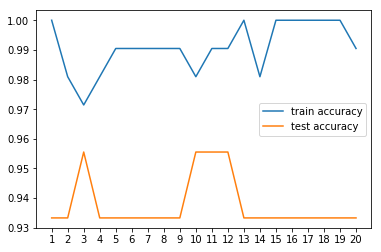

In [52]:
plt.plot(range(1,21), train_scores,label="train accuracy")
plt.plot(range(1,21), test_scores,label="test accuracy")
plt.xticks(range(1,21))
plt.legend()
plt.show()

In [10]:
cancer = datasets.load_breast_cancer()

In [11]:
X = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
knn = KNeighborsClassifier()

In [13]:
y =cancer['target']

In [14]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
knn.score(X,y)

0.9472759226713533

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                random_state=42,stratify=y)

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
knn.score(X_test,y_test)

0.9239766081871345

In [21]:
knn.score(X_train,y_train)

0.949748743718593

In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9239766081871345

In [46]:
test_scores=[]
train_scores=[]
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    score_test = model.score(X_test,y_test)
    score_train = model.score(X_train,y_train)
    test_scores.append(score_test)
    train_scores.append(score_train)



plt.plot(range(1,21), train_scores,label="train accuracy")
plt.plot(range(1,21), test_scores,label="test accuracy")
plt.xticks(range(1,21))
plt.legend()
plt.show()

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

In [61]:
np.random.seed(5)
for i in range(10):    
    print(np.random.randint(7))

3
6
5
6
6
0
1
0
4
6


In [ ]:
KNeighborsClassifier()

In [67]:
class 1

0.2    - 1/0.2= 5
0.5    - 1/0.5= 2

7



class 2

1.1   - 1/1.1=0.9
1.0   - 1/1=1
0.8   - 1/0.8=1.25

3.15

distance = ((x2-x1)^2+(y2-y1)^2)^(1/2)   p =2

distance = |x2-x1|+|y2-y1|   p=1

distance = (|x2-x1|^3+|y2-y1|^3)^(1/3)  p=3

SyntaxError: invalid syntax (<ipython-input-67-103fa3f02a50>, line 1)

In [68]:
boston = datasets.load_boston()

In [69]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [70]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [71]:
boston.data.shape

(506, 13)

In [72]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [73]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [77]:
X = pd.DataFrame(boston.data,columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [75]:
y = boston.target

In [78]:

p1 - 1.2 - 21
p2 - 1.8 - 20
p3 - 5 -  12
p4 - 2.2 - 25
p5 - 0.3 - 21


NameError: name 'p1' is not defined

In [80]:
knn = KNeighborsRegressor()

In [81]:
knn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [85]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.predict(X_test)

array([24.54, 29.34, 14.6 , 28.96, 17.44, 31.88, 20.58, 16.06, 18.02,
       21.18, 21.9 , 21.88, 12.28, 21.6 , 23.7 , 22.22, 21.18, 14.06,
       33.72, 10.6 , 25.86, 29.34, 17.56, 21.08, 18.88, 23.16, 22.92,
       12.34, 21.9 , 21.44, 22.68, 23.42, 10.3 , 30.04, 17.54, 21.12,
       21.66, 25.9 , 22.52, 27.82, 21.18, 27.98, 38.82, 22.4 , 24.84,
       12.6 , 20.22, 28.96, 19.8 , 21.56, 22.44, 34.7 , 22.04, 21.18,
       30.36, 21.38, 12.5 , 35.04, 21.74, 20.6 , 25.3 , 38.82, 28.96,
       16.26, 30.46, 24.24, 12.24, 25.3 , 35.04, 12.34, 23.02, 22.52,
       14.82, 30.38, 21.4 ,  8.98, 19.68, 38.82, 10.94, 15.04, 22.4 ,
       15.96, 26.3 , 12.24, 22.02, 34.  , 14.16, 22.58, 26.04, 17.86,
       23.24, 15.22, 17.48, 21.7 , 24.76, 17.86, 30.16, 10.76, 10.76,
       11.92, 21.8 , 21.4 , 23.16, 21.28, 22.22, 10.88, 23.96, 24.56,
       23.02, 26.3 ,  9.98, 15.74, 23.02, 33.04, 32.8 , 15.22, 29.42,
       17.2 , 21.6 , 22.44, 24.78, 31.62,  9.78, 20.12, 23.8 , 23.7 ,
       28.28, 26.04,

In [86]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

In [88]:
Mean_squared_error =mean (prediction - actual_value)^2


NameError: name 'mean' is not defined

In [89]:
y_pred = knn.predict(X_test)
mean_squared_error(y_test,y_pred)

30.94554736842105

In [90]:
prediction actual_value

10    15   - -5 - 25
8      9   - -1 - 1
10    7    -  3 - 9

mean_squared_error = 11.67



SyntaxError: invalid syntax (<ipython-input-90-52482db1cbd8>, line 1)

In [91]:
knn.score(X_test,y_test)

0.5846965270656936

In [93]:
np.mean(y_test)

21.407894736842106

In [94]:
y_pred_avg = []
for i in range(len(y_test)):
    y_pred_avg.append(np.mean(y_test))

In [95]:
y_pred_avg

[21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736842106,
 21.407894736

In [96]:
mean_squared_error(y_test,y_pred_avg)

74.51309556786703

In [97]:
1 - mean_squared_error(y_test,y_pred)/mean_squared_error(y_test,y_pred_avg)

0.5846965270656936

In [98]:
accuracy = 1 - mse(our_model)/mse(average_prediction)


if mse(our_model)= 0  accuracy =1
if mse(our_model)== mse(avg_pred)  accuracy = 0
if mse(our_model)> mse(avg_pred) accuracy<0

R_squared metric - statistics 


SyntaxError: invalid syntax (<ipython-input-98-541c8e1ac74c>, line 4)

In [100]:
boston = datasets.load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                test_size=0.3,random_state=42)

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.5846965270656936

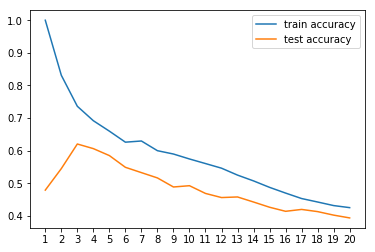

In [101]:
test_scores=[]
train_scores=[]
for i in range(1,21):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    score_test = model.score(X_test,y_test)
    score_train = model.score(X_train,y_train)
    test_scores.append(score_test)
    train_scores.append(score_train)
plt.plot(range(1,21), train_scores,label="train accuracy")
plt.plot(range(1,21), test_scores,label="test accuracy")
plt.xticks(range(1,21))
plt.legend()
plt.show()

In [106]:
knn = KNeighborsRegressor(n_neighbors=3,n_jobs=-1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6202349326037544

In [1]:
datasets.load_wine
datasets.load_diabetes

wines- classification problem 

diabetes - regression problem



SyntaxError: invalid syntax (<ipython-input-1-9213f3135e1a>, line 4)

In [3]:
boston = datasets.load_boston()

In [4]:
X= boston.data

In [5]:
y=boston.target

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [20]:
X_rooms= X[:,[5]]

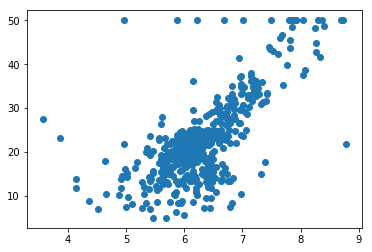

In [13]:
plt.scatter(X_rooms,y)
plt.show()

In [14]:
x data
y prediction

y = mx + c

y = b + ax

SyntaxError: invalid syntax (<ipython-input-14-48eb909fc15d>, line 1)

In [15]:
each point we have y - correct value
                   y_pred - predicted value
    error         = |y-y_pred|^2
    
Error function = sum of errors squared
 Error Function              = sigma(|y-y_pred|^2)
    d ErrorFunction/ da


p1 10 12   - 2
p2 15 17   - 2
p3 12  8   - 4

Error function = 2^2+2^2+4^2 = 24

SyntaxError: invalid syntax (<ipython-input-15-c65365ca53b9>, line 1)

In [17]:
y = b + a1 * x1 + a2 *x2 +a3 * x3+ ....... + an * xn

SyntaxError: invalid syntax (<ipython-input-17-b29a5eb15f56>, line 1)

In [18]:
model = LinearRegression()

In [21]:
model.fit(X_rooms,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

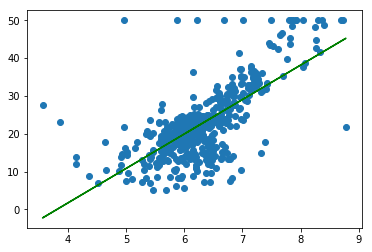

In [24]:
plt.scatter(X_rooms.flatten(),y)
plt.plot(X_rooms.flatten(), model.predict(X_rooms),'g')
plt.show()

In [25]:
model.intercept_

-34.67062077643857

In [26]:
model.coef_

array([9.10210898])

In [27]:
-34 + 9.1 * no_rooms

NameError: name 'no_rooms' is not defined

In [28]:
mean_squared_error(y,model.predict(X_rooms))

43.60055177116956

In [29]:
model = LinearRegression()

In [30]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
y_pred = model.predict(X)

In [32]:
mean_squared_error(y,y_pred)

21.897779217687496

In [33]:
model.intercept_

36.49110328036103

In [34]:
model.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

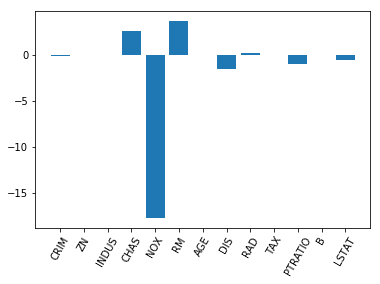

In [36]:
plt.bar(boston.feature_names,model.coef_)
plt.xticks(rotation=60)
plt.show()

In [37]:
boston = datasets.load_boston()

In [38]:
X = boston.data
y = boston.target

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                random_state=42)

In [40]:
model= LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.71092035863263

In [41]:
model.score(X_train,y_train)

0.7435020371198368

In [42]:
model.predict(X_test)

array([28.65507152, 36.50208976, 15.41877538, 25.4123428 , 18.84504144,
       23.15193132, 17.39045794, 14.07068504, 23.04106392, 20.5997909 ,
       24.82848981, 18.52972656, -6.89338718, 21.80647623, 19.23044706,
       26.18284059, 20.28099565,  5.61147028, 40.44518211, 17.57213704,
       27.44750834, 30.17592819, 10.92939394, 24.0192381 , 18.06277152,
       15.93524273, 23.13784817, 14.49181123, 22.33889889, 19.32732276,
       22.1740459 , 25.19724098, 25.31414125, 18.51391365, 16.60898647,
       17.48281643, 30.95248869, 20.19196715, 23.90566388, 24.87331497,
       13.93612301, 31.82414012, 42.56492347, 17.62944481, 27.02392519,
       17.1891161 , 13.79929973, 26.10739476, 20.31403576, 30.09296805,
       21.31686534, 34.1606385 , 15.59905068, 26.11282476, 39.31618827,
       22.99094172, 18.95021816, 33.05721471, 24.85373006, 12.91490043,
       22.67333429, 30.795732  , 31.63743635, 16.28548951, 21.06900792,
       16.58193817, 20.35778853, 26.16063538, 31.07034018, 11.92

In [43]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

In [44]:
Compare
KNN vs LinearRegression

Question , which is better?

KNN
1) Equal importance to all columns when calculating distance
2) column1 - 1000-2000
   column2 - 1 -2 
    
    (1000-1100)^2 = 10,000
    (1-2)^2 = 1
     
3) It works badly if all regions are not population. 
Prediction on a unpopulated region, will have large errors.

4) can handle non-linearity 
 
    

Linear Regression
1) If input does not have linear relationship with target,
it will give large errors.
2) Without scaling also it can work fine.
3) It supports different weightages for different features.

SyntaxError: invalid syntax (<ipython-input-44-84ea8bac1c6b>, line 2)

In [45]:
Logistic Regression for binary classification

a1 * x1+ a2*x2+....+ an * xn + b >=0 ? Class 1
a1 * x1+ a2*x2+....+ an * xn + b <0 ? Class 0


Fit
y is  +1 for class 1
y is -1 for class 0


Y Prediction
-infinity to infinity

0-infinity -- class 1
-infinity -0  -- class 0

Y_prediction is mapped from -infinity to +infinity to 0-1 range
using Tanh or Sigmoid function 

0.5 - 1 -- class 1
0  - 0.5  -- class 0

value is same as probability of class 1
1-value is same as probability of class 0


SyntaxError: invalid syntax (<ipython-input-45-67d1bda71beb>, line 1)

In [ ]:
d(EF)/da = -2

new_value_a = a - 2 * lr


 predicted line 
    y = a*x + b